In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date= session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

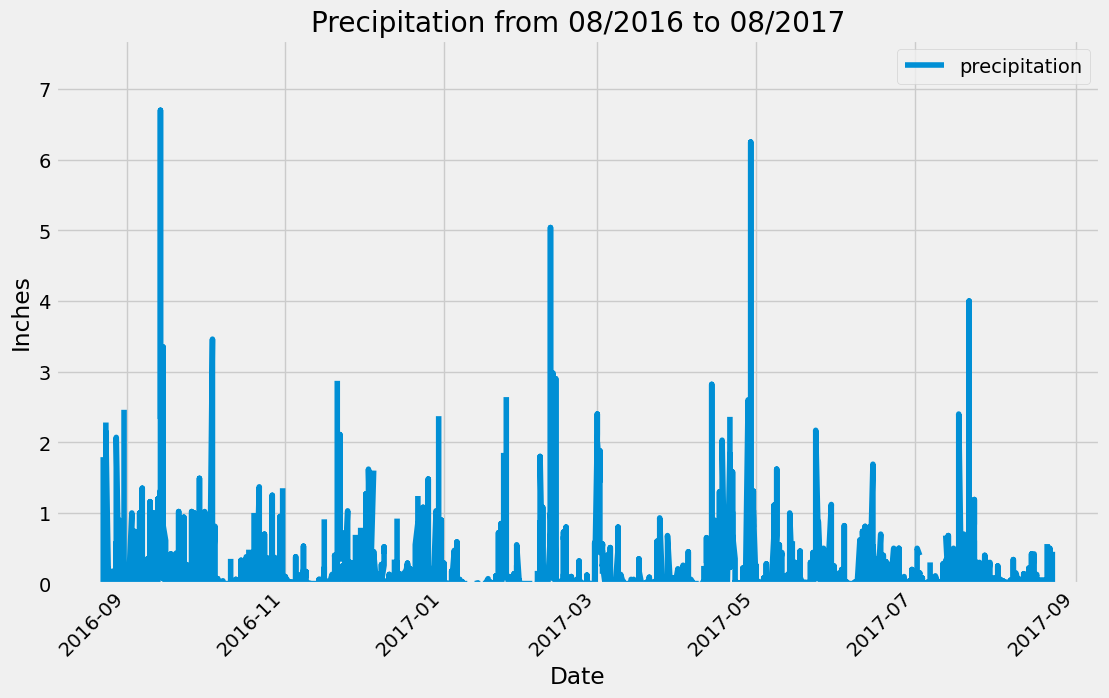

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in the dataset.
year_ago = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame
measure_df = pd.DataFrame(query).rename(columns={'prcp': 'precipitation'})

# Convert the 'date' column to datetime format
measure_df['date'] = pd.to_datetime(measure_df['date'])

# Set the 'date' column as the DataFrame index
measure_df.set_index('date', inplace=True)

# Sort the DataFrame by date
measure_df.sort_index(inplace=True)

# Plot the data using Pandas Plotting with Matplotlib
measure_df.plot(title='Precipitation from 08/2016 to 08/2017', figsize=(12, 8), rot=45)
plt.legend(loc='upper right')
plt.ylim(0, 7.7)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()


In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

precipitation_stats = measure_df['precipitation'].describe()
precipitation_stats

count   2021.00
mean       0.18
std        0.46
min        0.00
25%        0.00
50%        0.02
75%        0.13
max        6.70
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
x = len(session.query(station).all())
print(x)

9


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
ordered_stations = session.query(measurement.station,
                    func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
ordered_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
]

most_active = session.query(*sel).filter_by(station="USC00519281").all()

print(most_active)

[(54.0, 85.0, 71.66378066378067)]


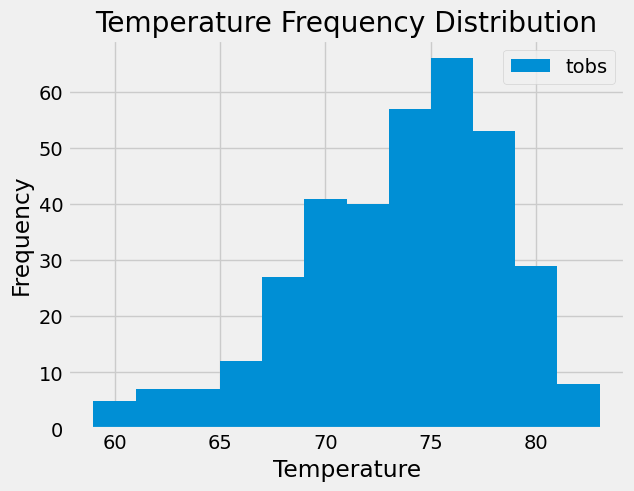

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12 = session.query(measurement.date, measurement.tobs).\
    filter_by(station="USC00519281").\
    filter(measurement.date >= year_ago).all()

# Create a dataframe for plotting the histogram
last_12_df = pd.DataFrame(last_12)

# Create the histogram
last_12_df.plot(kind="hist", bins=12)
plt.xlabel('Temperature')
plt.title('Temperature Frequency Distribution')
plt.show()

# Close Session

In [19]:
date_prcp = session.query(measurement.date, measurement.prcp).all()
x = []
for date, prcp in date_prcp:
    date_dict = {}
    date_dict[date] = prcp
    x.append(date_dict)

In [20]:
# Close Session
session.close()